In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score
import pickle
import os.path
import matplotlib.pyplot as plt
import spacy
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
df=pd.read_csv("MBTI 500.csv")

In [22]:
df.head(10)

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ
5,loose stop overthinking everything ruin friend...,INTJ
6,often men one put chance get burn otherwise no...,INTJ
7,early definitely relate quiet self destruction...,INTJ
8,one full list would impossibly long quotable f...,INTJ
9,technique information power share unless absol...,INTJ


In [27]:
print("Post ----->",df["posts"][1])
print("Type ----->",df["type"][1])

Post -----> rap music ehh opp yeah know valid well know fact people like socialize party even personality let alone personality type reason remain mystery likely function stack see party goer barely function function stack well fact even get two together nigh impossible lead entire personality consist shadow function though theorize widely dismiss though may help explain inherent love night life like something stop apply eliminate genuine character flaw quickly notice rationalisation vote trump basically hillary attractive candidate lacklustre corrupt beg question president racist sexist bad really care le either way judge quality popularity stop pussy something swing go bar pick random one night stand also apps like tinder casual sex unattractive time energy relationship hire prostitute kind thing appeal masturbate use pornography imagination choice want commit relationship give advice think cover option take point realize spend much time try educate win topic reason waste energy even

In [42]:
print("All unique personality types----->",len(df['type'].unique()),"\n",df['type'].unique())

All unique personality types-----> 16 
 ['INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP' 'ENFJ' 'ENFP' 'ENTJ' 'ENTP'
 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP']


In [44]:
df.isnull().sum()

posts    0
type     0
dtype: int64

<BarContainer object of 16 artists>

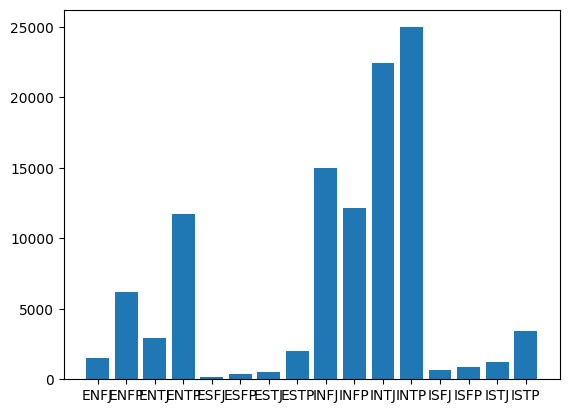

In [83]:
Bar_Chart=df.groupby("type").count()

x=df.groupby("type").count().index
y=df.groupby("type").count()["posts"]

plt.bar(x,y)

In [84]:
X = df['posts'] # features
y = df['type']  # labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [88]:
vectorizer = TfidfVectorizer()

In [89]:
X_train_tfidf = vectorizer.fit_transform(X_train)

In [90]:
clf = LinearSVC()
clf.fit(X_train_tfidf, y_train)

LinearSVC()

In [91]:
text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [92]:
pickle.dump(text_clf, open("MBTI model 1", 'wb'))

In [93]:
predictions = text_clf.predict(X_test)

In [94]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        ENFJ       0.79      0.63      0.70       307
        ENFP       0.83      0.78      0.80      1250
        ENTJ       0.89      0.77      0.83       570
        ENTP       0.85      0.85      0.85      2295
        ESFJ       0.59      0.37      0.46        35
        ESFP       0.89      0.65      0.75        74
        ESTJ       0.95      0.81      0.87       107
        ESTP       0.95      0.88      0.92       358
        INFJ       0.83      0.85      0.84      3006
        INFP       0.81      0.84      0.83      2455
        INTJ       0.84      0.87      0.85      4493
        INTP       0.85      0.89      0.87      5020
        ISFJ       0.71      0.50      0.58       125
        ISFP       0.78      0.61      0.68       180
        ISTJ       0.84      0.60      0.70       261
        ISTP       0.89      0.79      0.84       678

    accuracy                           0.84     21214
   macro avg       0.83   

In [96]:
# Load pickled model from file
model = pickle.load(open("MBTI model 1", 'rb'))

# Define function for prediction
def predict_class(input_text):
    predicted_class = model.predict([input_text])
    return predicted_class[0]


In [97]:
user_input = input("Enter some text to classify: ")
predicted_class = predict_class(user_input)
print("Your Input is :",user_input,"\n","Predicted class:", predicted_class)

Your Input is : Sometimes i am afraid with multiple things like what to do or what to not its just running in my mind that i cant do it anymore and i think that there is no one for me  
 Predicted class: ESTP
